# Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. 
A set of reasonably clean records was extracted using the following conditions: 
((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Attribute Information:
Listing of attributes:
>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 
1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, 
Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, 
Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,
Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland,
Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Prediction task is to determine whether a person makes over 50K a year.
So here we will use classification technique.

# 1-Data Exploration (Reading the data and putting the attributes name)

In [1]:
#Importing all basic required libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#lets import the Herat data and print them
censusincome=pd.read_csv('censusincome.csv')
print(censusincome.shape)

print(censusincome.head(10))

(32560, 15)
   39          State-gov   77516      Bachelors   13           Never-married  \
0  50   Self-emp-not-inc   83311      Bachelors   13      Married-civ-spouse   
1  38            Private  215646        HS-grad    9                Divorced   
2  53            Private  234721           11th    7      Married-civ-spouse   
3  28            Private  338409      Bachelors   13      Married-civ-spouse   
4  37            Private  284582        Masters   14      Married-civ-spouse   
5  49            Private  160187            9th    5   Married-spouse-absent   
6  52   Self-emp-not-inc  209642        HS-grad    9      Married-civ-spouse   
7  31            Private   45781        Masters   14           Never-married   
8  42            Private  159449      Bachelors   13      Married-civ-spouse   
9  37            Private  280464   Some-college   10      Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Hus

In [3]:
#lets put the attributes name in the dataset
censusincome.columns= ["age", "workclass", "fnlwgt", 
                        "education", "education_num", 
                        "marital_status", "occupation",
                        "relationship", "race", "sex", 
                        "capital_gain", "capital_loss", 
                        "hours_per_week", "native_country", "income"]

print(censusincome.shape)
print(censusincome.head())

(32560, 15)
   age          workclass  fnlwgt   education  education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital_status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0             0             0              13   United-S

In [24]:
#checking the information of the data and is there any null values present
censusincome.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# 2-Exploratory Data Analysis (Exploring, Cleaning, Imputing & Visualizing)

In [25]:
print(np.unique(censusincome['workclass'], return_counts=True))

(array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object), array([ 1836,   960,  2093,     7, 22696,  1116,  2541,  1297,    14],
      dtype=int64))


In [26]:
columns= ["age", "workclass", "fnlwgt","education", "education_num","marital_status", "occupation","relationship",
          "race", "sex","capital_gain", "capital_loss","hours_per_week", "native_country", "income"]
for columns in censusincome:
    print("Column Name:",columns)
    print(np.unique(censusincome[columns], return_counts=True))
    print("\n")


Column Name: age
(array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 90], dtype=int64), array([395, 550, 712, 753, 720, 765, 877, 798, 841, 785, 835, 867, 813,
       861, 888, 828, 875, 886, 876, 898, 858, 827, 815, 794, 808, 780,
       770, 724, 734, 737, 708, 543, 577, 602, 595, 478, 464, 415, 419,
       366, 358, 366, 355, 312, 300, 258, 230, 208, 178, 150, 151, 120,
       108,  89,  72,  67,  64,  51,  45,  46,  29,  23,  22,  22,  20,
        12,   6,  10,   3,   1,   1,   3,  43], dtype=int64))


Column Name: workclass
(array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object), array([ 1836,   960,  2

In [4]:
#so here we saw there are some missing values for column workclass,occupation,native_country with "?" marks, 
#so we will drop those records
columns= ["age", "workclass", "fnlwgt","education", "education_num","marital_status", "occupation","relationship",
          "race", "sex","capital_gain", "capital_loss","hours_per_week", "native_country", "income"]
for columns in censusincome:
    print("Column Name:",columns)
    censusincome1= censusincome.replace({' ?':np.NaN})
    censusincome1[columns] = censusincome1[columns].replace(np.NaN,'')
    print(np.unique(censusincome1[columns], return_counts=True))
    print("\n")
print(censusincome1.shape)
censusincome2=censusincome1.dropna()
print(censusincome2.shape)


Column Name: age
(array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 90], dtype=int64), array([395, 550, 712, 753, 720, 765, 877, 798, 841, 785, 835, 867, 813,
       861, 888, 828, 875, 886, 876, 898, 858, 827, 815, 794, 808, 780,
       770, 724, 734, 737, 708, 543, 577, 602, 595, 478, 464, 415, 419,
       366, 358, 366, 355, 312, 300, 258, 230, 208, 178, 150, 151, 120,
       108,  89,  72,  67,  64,  51,  45,  46,  29,  23,  22,  22,  20,
        12,   6,  10,   3,   1,   1,   3,  43], dtype=int64))


Column Name: workclass
(array(['', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object), array([ 1836,   960,  209

In [28]:
#lets print all the columns with their datatype
censusincome2.dtypes

#so here workclass,education,marital_status,occupation,relationship,race,sex,native_country and income
#are object data type, so we will convert them to numeric for our analysis.

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [5]:
#lets find what are the types of records are there in income attribute
print(np.unique(censusincome2['income'], return_counts=True))
print(censusincome2['income'].value_counts())

(array([' <=50K', ' >50K'], dtype=object), array([22653,  7508], dtype=int64))
 <=50K    22653
 >50K      7508
Name: income, dtype: int64


In [6]:
#so here the income attribute has 2 values, so for model building we will convert it to 1(>50K) and 0(<=50K).
#so lets map those values
censusincome2['income'] = censusincome2['income'].map({' <=50K':0, ' >50K':1})

#again lets find what are the types of records are there in target attribute after mapping has been done
print(np.unique(censusincome2['income'], return_counts=True))
#counting the target varibales
print(censusincome2['income'].value_counts())

(array([0, 1], dtype=int64), array([22653,  7508], dtype=int64))
0    22653
1     7508
Name: income, dtype: int64


Text(0.5, 1.0, 'Income Vs Age')

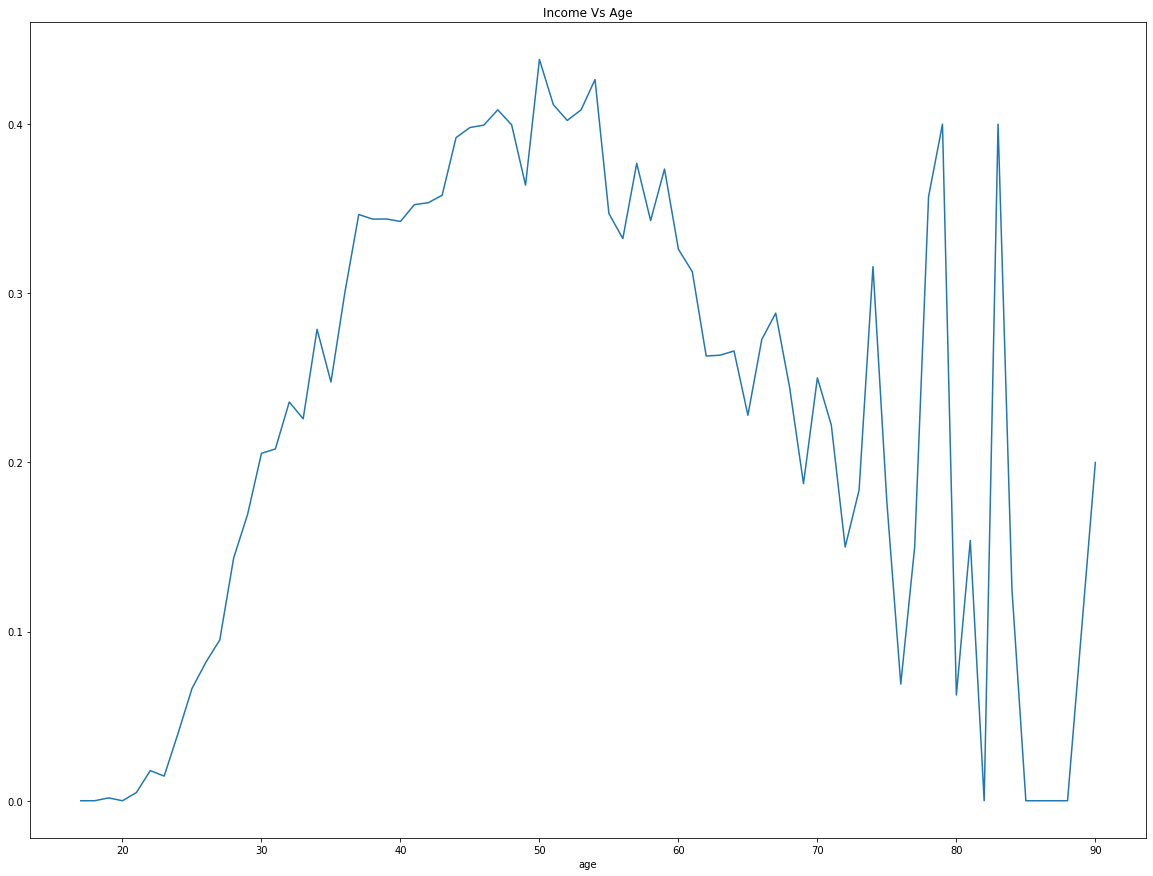

In [7]:
# now lets see the distribution of "income" changes wrt Age
byAge=censusincome2.groupby('age').mean()
plt.figure(figsize=(20,15))
byAge['income'].plot()
plt.title('Income Vs Age')


In [8]:
#lets go for "workclass","education","marital_status","occupation","relationship","race","sex","native_country"
# value to encode using one hot encoding technique.
from sklearn.preprocessing import OneHotEncoder

workclass=pd.get_dummies(censusincome2['workclass'],prefix='workclass')
print(workclass.shape)
print(workclass.head())
print('\n')
education=pd.get_dummies(censusincome2['education'],prefix='education')
print(education.shape)
print(education.head())
print('\n')
marital_status=pd.get_dummies(censusincome2['marital_status'],prefix='marital_status')
print(marital_status.shape)
print(marital_status.head())
print('\n')
occupation=pd.get_dummies(censusincome2['occupation'],prefix='occupation')
print(occupation.shape)
print(occupation.head())
print('\n')
relationship=pd.get_dummies(censusincome2['relationship'],prefix='relationship')
print(relationship.shape)
print(relationship.head())
print('\n')
race=pd.get_dummies(censusincome2['race'],prefix='race')
print(race.shape)
print(race.head())
print('\n')
sex=pd.get_dummies(censusincome2['sex'],prefix='sex')
print(sex.shape)
print(sex.head())
print('\n')
native_country=pd.get_dummies(censusincome2['native_country'],prefix='native_country')
print(native_country.shape)
print(native_country.head())

(30161, 7)
   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                       0                     0                   0   
1                       0                     0                   1   
2                       0                     0                   1   
3                       0                     0                   1   
4                       0                     0                   1   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  workclass_ State-gov  \
0                        0                            1                     0   
1                        0                            0                     0   
2                        0                            0                     0   
3                        0                            0                     0   
4                        0                            0                     0   

   workclass_ Without-pay  
0                       0  
1                  

In [9]:
#lets combine all the datas
combine=[censusincome2,workclass,education,marital_status,occupation,relationship,race,sex,native_country]
censusincome_final=pd.concat(combine,axis=1)
print(censusincome_final.shape)
print(censusincome_final.head())

(30161, 113)
   age          workclass  fnlwgt   education  education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital_status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   ...  native_country_ Portugal  native_country_ Puerto-Rico  \
0  ...                         0                            0 

In [10]:
#now lets drop those columns which are converted to onehotcoder from the dataset, 
#as we have converted them to numerical value
censusincome_final=censusincome_final.drop(columns=["workclass","education","marital_status","occupation","relationship","race","sex","native_country"])
print(censusincome_final.shape)
print(censusincome_final.head())

(30161, 105)
   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   50   83311             13             0             0              13   
1   38  215646              9             0             0              40   
2   53  234721              7             0             0              40   
3   28  338409             13             0             0              40   
4   37  284582             14             0             0              40   

   income  workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0       0                       0                     0                   0   
1       0                       0                     0                   1   
2       0                       0                     0                   1   
3       0                       0                     0                   1   
4       0                       0                     0                   1   

   ...  native_country_ Portugal  native_country_

# 3-Building Different Model and Finding the Best Model

In [11]:
#lets separating the input and output/target variables
x=censusincome_final.drop(columns=['income'])
y=censusincome_final[['income']]

print(x.shape)
print(y.shape)

(30161, 104)
(30161, 1)


In [12]:
#dividing the train and test dataset
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(24128, 104) (6033, 104)
(24128, 1) (6033, 1)


In [13]:
#defining the models which will be used for model building
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.svm import SVC
sv=SVC()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier()

In [14]:
#appending all the models
models=[]
models.append(('LogisticRegression',lr))
models.append(('SVC',sv))
models.append(('KNeighborsClassifier',knn))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
models.append(('MultinomialNB',mnb))
models.append(('RandomForestClassifier',rf))
models.append(('AdaBoostClassifier',ad))
models.append(('GradientBoostingClassifier',gd))

In [15]:
#lets import all the classification outputs
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

************************ LogisticRegression **********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score: 0.7879993369799436


Cross Value Score: 0.7904579069622273


roc_auc_score: 0.6100630631239565


Classification Report:               precision    recall  f1-score   support

           0       0.80      0.96      0.87      4531
           1       0.70      0.26      0.38      1502

    accuracy                           0.79      6033
   macro avg       0.75      0.61      0.62      6033
weighted avg       0.77      0.79      0.75      6033



Confusion Matrix:
 [[4370  161]
 [1118  384]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************ SVC ***************

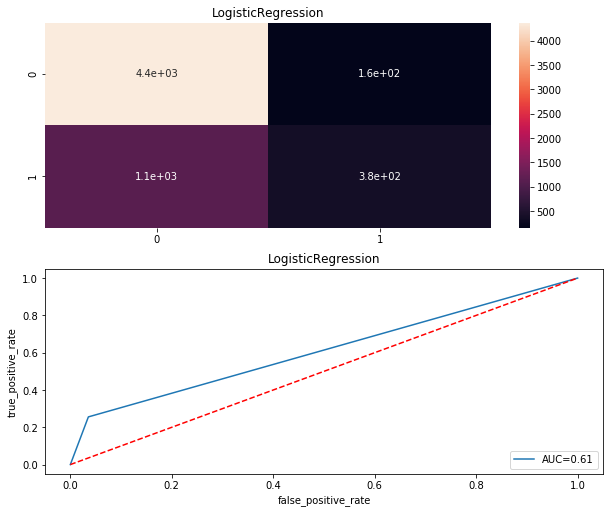

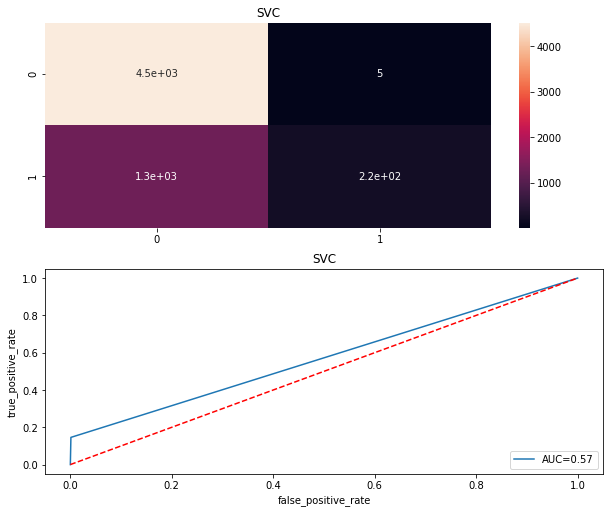

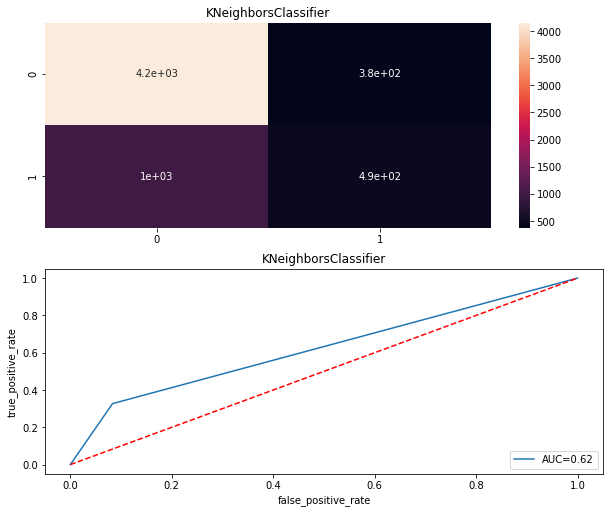

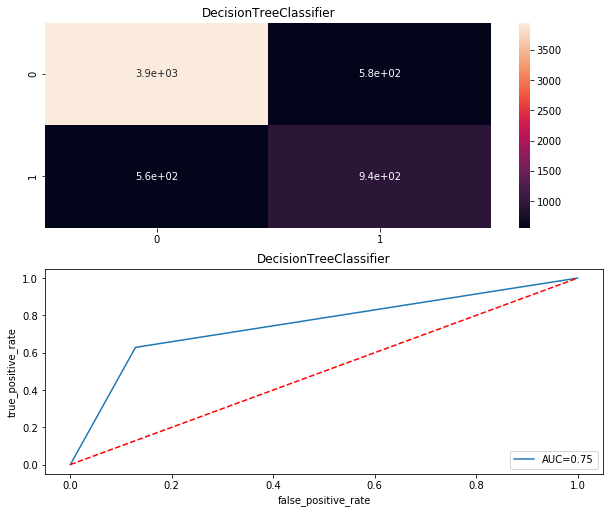

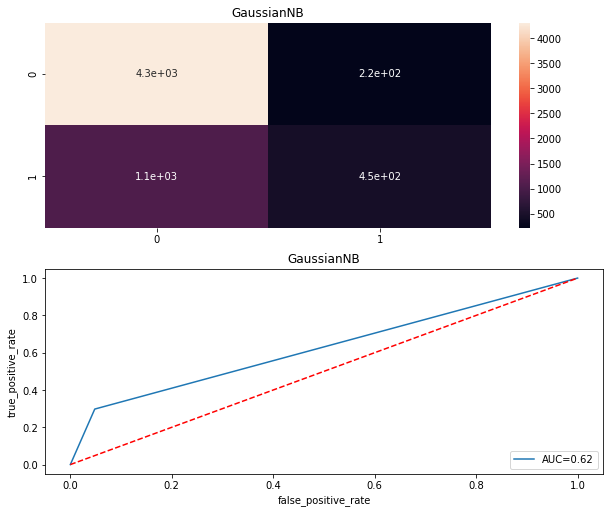

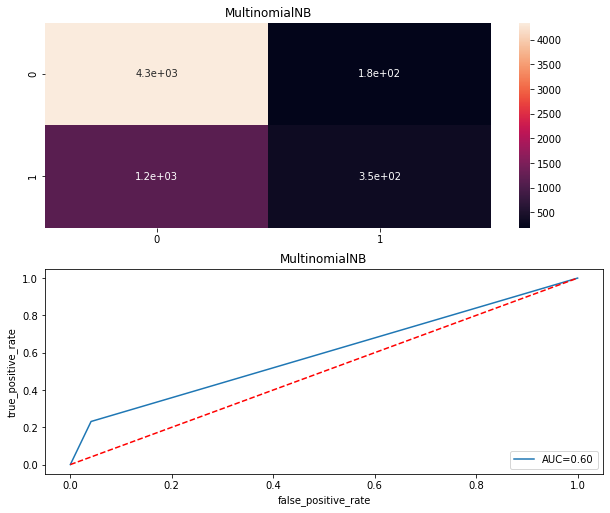

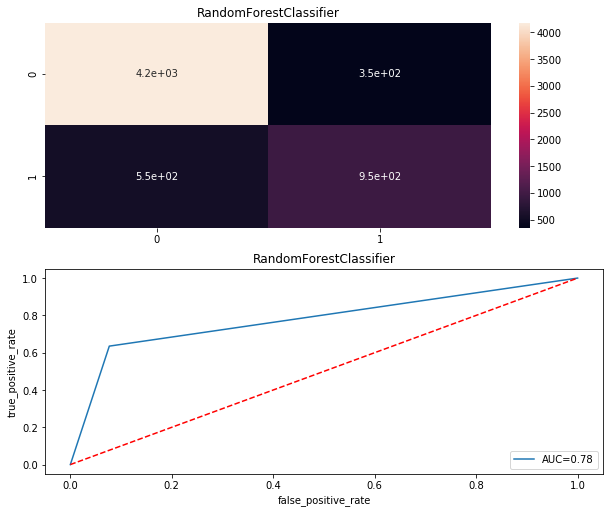

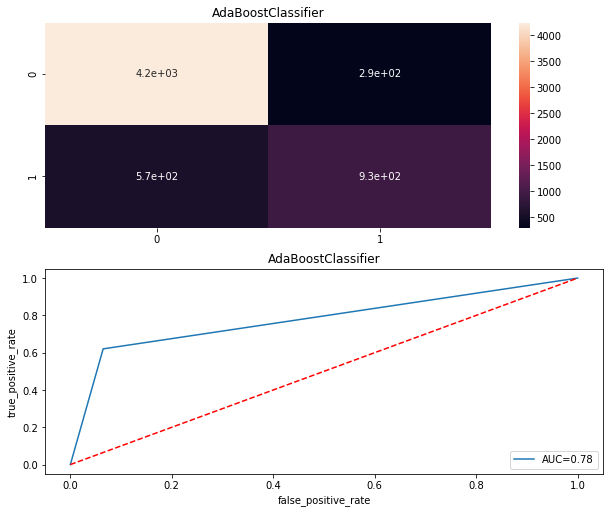

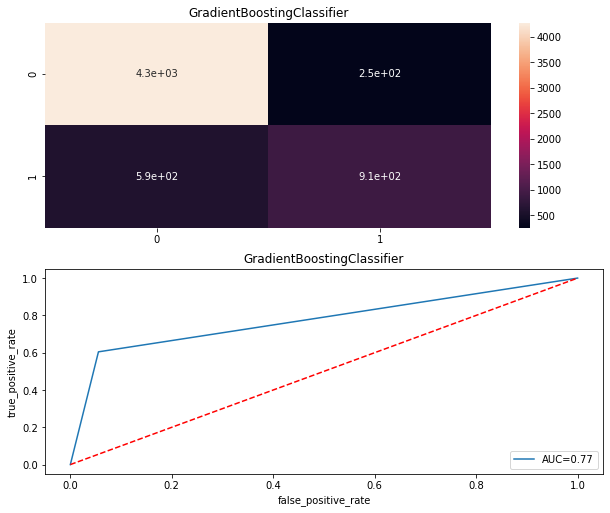

In [40]:
#printing the output of each model
Model=[]
score=[]
cvs=[]
rocscore=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score:',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model, x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score:',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score:',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    cr=classification_report(y_test,pred)
    print('Classification Report:',cr )
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('Confusion Matrix:\n',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('true_positive_rate')
    plt.xlabel('false_positive_rate')
    print('\n\n')

In [41]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Accuracy_Score':score,'Cross_Value_Score':cvs,'Roc_Auc_Curve':rocscore})
print(result)

                        Model  Accuracy_Score  Cross_Value_Score  \
0          LogisticRegression       78.799934          79.045791   
1                         SVC       78.650754          78.843537   
2        KNeighborsClassifier       76.993204          76.850906   
3      DecisionTreeClassifier       81.103928          81.283807   
4                  GaussianNB       78.899387          78.856805   
5               MultinomialNB       77.788828          77.620096   
6      RandomForestClassifier       85.148351          85.109948   
7          AdaBoostClassifier       85.695342          85.613885   
8  GradientBoostingClassifier       85.993701          86.247162   

   Roc_Auc_Curve  
0      61.006306  
1      57.235104  
2      62.184644  
3      75.002344  
4      62.474510  
5      59.509773  
6      77.917445  
7      77.792018  
8      77.456557  


In [52]:
# So here GradientBoostingClassifier is the best model, so lets find out the best parameter for this to get maximum score
#lets use grid search method to find optimal value 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier 
gdbc=GradientBoostingClassifier()
parameters={'n_estimators':[100,200,500,1000],'learning_rate':[0.001,0.01,0.1,0.5,1.0]}
clf=GridSearchCV(gdbc, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

Accuracy Score is: 0.8672302337145699
Cross Value Score: 0.8703293626127453
ROC_AUC Score: 0.7941085541502672
Confusion Matix:
 [[4258  273]
 [ 528  974]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      4531
           1       0.78      0.65      0.71      1502

    accuracy                           0.87      6033
   macro avg       0.84      0.79      0.81      6033
weighted avg       0.86      0.87      0.86      6033

AxesSubplot(0.125,0.808774;0.62x0.0712264)


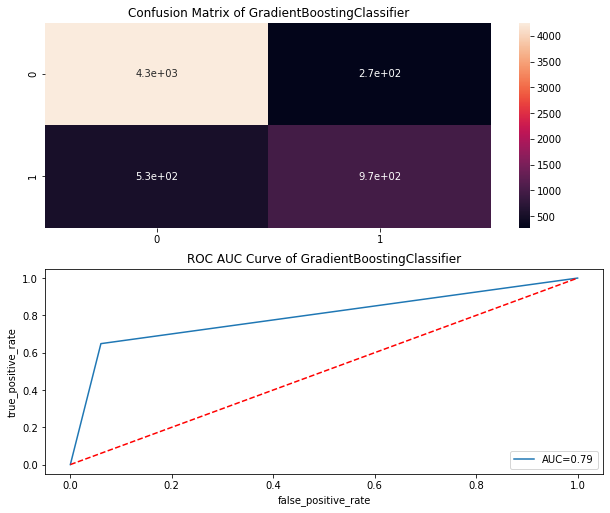

In [16]:
# So lets build the final model with n_estimators=500 and learning_rate=0.1

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
gdbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=500)
gdbc.fit(x_train,y_train)
pred_gdbc=gdbc.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test,pred_gdbc))
print('Cross Value Score:', cross_val_score(gdbc, x,y,cv=10,scoring='accuracy').mean())
false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,pred_gdbc)
print('ROC_AUC Score:',auc(false_positive_rate,true_positive_rate))
print('Confusion Matix:\n', confusion_matrix(y_test,pred_gdbc))
print('Classification Report:\n', classification_report(y_test,pred_gdbc))

#lets print the confusion matrix
cm=confusion_matrix(y_test,pred_gdbc)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('Confusion Matrix of GradientBoostingClassifier')
print(sns.heatmap(cm,annot=True))
plt.subplot(912)

#lets print the roc auc curve
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.title('ROC AUC Curve of GradientBoostingClassifier')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right') 


In [17]:
#lets predict the income of census data
print('Actual Income as per Census Data:\n',y_test)
print('Predicted Income as per Census Data:\n',pred_gdbc)

Actual Income as per Census Data:
        income
1916        0
7273        0
30972       1
21747       0
6433        0
...       ...
3747        0
7954        0
23096       0
30770       0
4573        0

[6033 rows x 1 columns]
Predicted Income as per Census Data:
 [0 0 0 ... 0 0 0]


In [18]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(gdbc,'gdbc_income.obj')

['gdbc_income.obj']

In [19]:
Income_from_joblib=joblib.load('gdbc_income.obj')

In [20]:
#Use the loaded model to make predictions against test data
Income_from_joblib.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Conclusion:
    
So here 'GradientBoostingClassifier Model' is the best model out of all model tested above and by looking this we 
can conclude that our model is predicting around 87% of correct results for predicting a person makes over 50K in a year.